<a href="https://colab.research.google.com/github/SMC-AAU-CPH/ML-For-Beginners/blob/main/4-Web-App/images/4-Workshop-VC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4 Workshop (Part 1): 🥷 Tools Ninja

## 4.1 Operations: git updates and venv (towards rethinking Assigments 2 & 3)



Before going into details, would you like to accelerate and simplify your experimentation in Assignments 2 & 3?

Then check `pycaret`, an open-source, a low-code ML library at https://pycaret.gitbook.io/.

A regression workflow looks like this in pyaceret:

![Regression with Functional API](https://1927305171-files.gitbook.io/~/files/v0/b/gitbook-x-prod.appspot.com/o/spaces%2FjAq5m5T7Qtz03TnB0Wve%2Fuploads%2FgTROKBMFONTsqypBKQcS%2Fregression_functional.png?alt=media&token=3e548aa2-eee5-46bf-ae22-7592d41588ca)

A classification workflow looks like this in pyaceret:

![Classification with Functional API](https://1927305171-files.gitbook.io/~/files/v0/b/gitbook-x-prod.appspot.com/o/spaces%2FjAq5m5T7Qtz03TnB0Wve%2Fuploads%2FdghtBxphPufGO3uOyHiU%2Fclassification_functional.png?alt=media&token=dbe9dfca-3c0e-45ca-b2b2-8a040115b9d4)

These apply to all `scikit-learn` models, and similar APIs exist also for the future topics like clustering and time-series analysis.

In this workshop, we will use it to test classification and regression, and deploy our best models. Before that, however, we check out our code and make a safe virtual environment for our experimentations without affecting our main codebase.

###  4.1.1 git operations



If you *cloned* the https://github.com/SMC-AAU-CPH/ML-For-Beginners repo just issue ```git status``` and wait to see "Already up to date"

If there are conflicts, you can `stash` your changes for not loosing them and move on.   


In [ ]:
# ! git stash           // stash the local changes and reset your working directory
# ! git pull            // pull the latest changes from the remote and merge them
# ! git stash pop       // apply your stashed changes back to your working directory


If you have *forked* the https://github.com/SMC-AAU-CPH/ML-For-Beginners repo, you set its `upstream` and either `pull` or `merge` the changes. To try programatically in a Terminal, uncomment the code below.


In [ ]:
# ! git remote add upstream https://github.com/SMC-AAU-CPH/ML-For-Beginners
# ! git fetch upstream
# ! git merge upstream/main
# ! git push origin main

## 4.2 Introducing PyCaret: Regression


pycaret workflow

Setup ➡️ Compare Models ➡️ Analyze Model ➡️ Prediction ➡️ Save Model

### 4.2.1 Regression workflow


In [2]:
# check installed version (must be >3.0)
import pycaret
pycaret.__version__

'3.3.2'

PyCaret's Regression Module is a supervised machine learning module that is used for estimating the relationships between a dependent variable (often called the outcome variable, or target) and one or more independent variables (often called features, predictors, or covariates).

The objective of regression is to predict continuous values such as predicting sales amount, predicting quantity, predicting temperature, etc. Regression module provides several pre-processing features to preprocess the data for modeling through the setup function.

PyCaret's regression module has many preprocessing capabilities and it coems with over 25 ready-to-use algorithms and several plots to analyze the performance of trained models.

In [3]:
### load sample dataset from pycaret dataset module
from pycaret.datasets import get_data
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### Setup

The `setup` function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function in PyCaret. It only has two required parameters i.e. `data` and `target`. All the other parameters are optional.


In [4]:
# import pycaret regression and init setup
import pycaret.regression
from pycaret.regression import *
s_reg = setup(data, target = 'charges', session_id = 123)

,Description,Value
0,Session id,123
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(936, 10)"
6,Transformed test set shape,"(402, 10)"
7,Numeric features,3
8,Categorical features,3
9,Preprocess,True


We will discuss several items in this info grip. PyCaret has two set of API's that you can work with. (1) Functional (as seen above) and (2) Object Oriented API. We will use the Functional API in the following. If OOP is your coding style, use it instead. You can even switch back and forth between two set of API's. The choice of method will not impact the results and has been tested for consistency.


#### Compare Models

The `compare_models` function trains and evaluates the performance of all the estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [5]:
# compare baseline models, we exclude lightgbm because it enables GPU on some machines
best = compare_models(exclude=["lightgbm"])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2701.9927,23548981.3626,4832.9682,0.8320,0.4447,0.3137,0.0170
rf,Random Forest Regressor,2771.4583,25416502.3827,5028.6343,0.8172,0.4690,0.3303,0.0440
et,Extra Trees Regressor,2833.3624,28427844.2412,5305.6516,0.7991,0.4877,0.3363,0.0300
ada,AdaBoost Regressor,4316.0568,29220505.6498,5398.4561,0.7903,0.6368,0.7394,0.0100
lar,Least Angle Regression,4303.5559,38388058.4578,6176.5920,0.7306,0.5949,0.4433,0.0080
br,Bayesian Ridge,4311.2349,38391950.0874,6176.8896,0.7306,0.5910,0.4447,0.0090
llar,Lasso Least Angle Regression,4303.7694,38386824.2786,6176.4846,0.7306,0.5952,0.4434,0.0120
ridge,Ridge Regression,4317.6984,38396435.9578,6177.2329,0.7306,0.5891,0.4459,0.0090
lasso,Lasso Regression,4303.7697,38386797.6709,6176.4824,0.7306,0.5952,0.4434,0.0120
lr,Linear Regression,4303.5559,38388058.4578,6176.5920,0.7306,0.5949,0.4433,0.7420


#### Analyze Model

The `plot_model` function is used to analyze the performance of a trained model on the test set. It may require re-training the model in certain cases.

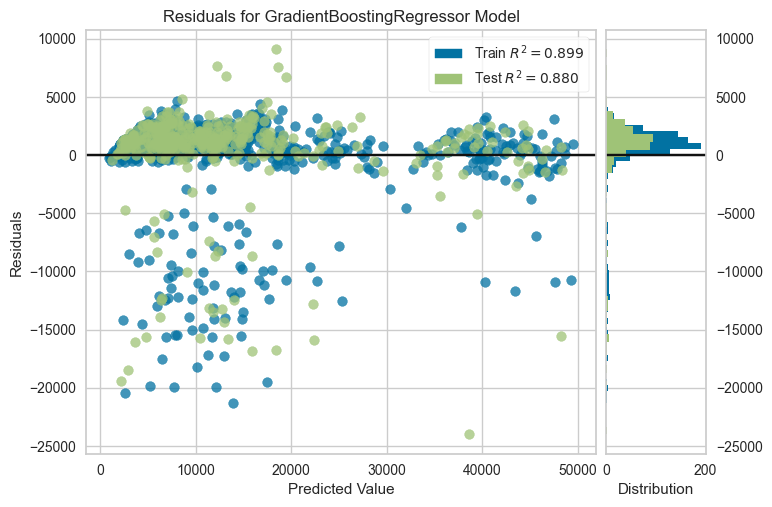

In [6]:
# plot residuals
plot_model(best, plot = 'residuals')

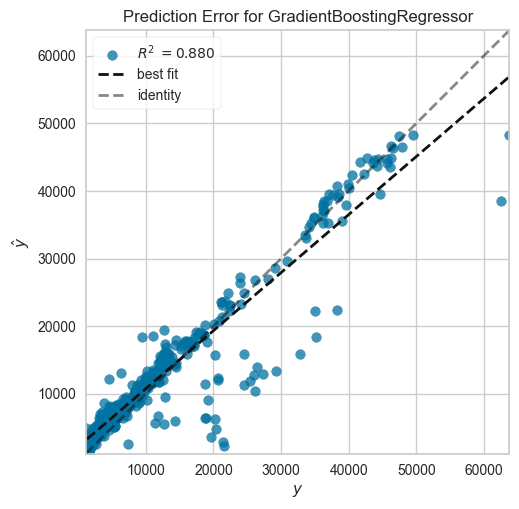

In [7]:
# plot error
plot_model(best, plot = 'error')

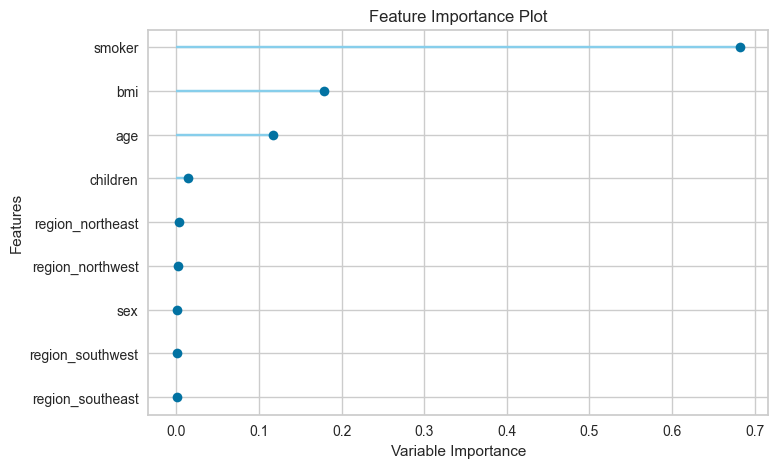

In [8]:
# plot feature importance
plot_model(best, plot = 'feature')

In [9]:
# Hover over or check docstring to see available plots
# help(plot_model)

An alternate to `plot_model` function is `evaluate_model`. It is interactive, click on one tab and wait to see the results.

In [10]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

#### Prediction


The `predict_model` function returns `prediction_label` as new column to the input dataframe. When data is `None` (default), it uses the test set (created during the setup function) for scoring.

In [11]:
# predict on test set
holdout_pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2392.5661,17148355.3169,4141.0573,0.8800,0.3928,0.2875


In [12]:
# show predictions df
holdout_pred.head()

,age,sex,bmi,children,smoker,region,charges,prediction_label
650,49,female,42.680000,2,no,southeast,9800.888672,10681.513104
319,32,male,37.334999,1,no,northeast,4667.607422,8043.453463
314,27,female,31.400000,0,yes,southwest,34838.871094,36153.097686
150,35,male,24.129999,1,no,northwest,5125.215820,7435.516853
336,60,male,25.740000,0,no,southeast,12142.578125,14676.544334


The same function works for predicting the labels on unseen dataset. Let's create a copy of original data and drop the `charges`. We can then use the new data frame without labels for scoring.

In [13]:
# copy data and drop charges

new_data = data.copy()
new_data.drop('charges', axis=1, inplace=True)
new_data.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [14]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,age,sex,bmi,children,smoker,region,prediction_label
0,19,female,27.900000,0,yes,southwest,18464.334448
1,18,male,33.770000,1,no,southeast,4020.345384
2,28,male,33.000000,3,no,southeast,6555.388388
3,33,male,22.705000,0,no,northwest,9627.045725
4,32,male,28.879999,0,no,northwest,3325.531292


#### Save Model

Finally, you can save the entire pipeline on disk for later use, using pycaret's `save_model` function.

In [15]:
# save pipeline (in pkl)
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'bmi', 'children'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['sex', 'smoker', 'region'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapper(include=['sex', 'smoker'],
                                     transfor...
                                                                          'data_type': dtype('O'),
                                                                          'mapping': female    0
 male      1
 NaN      -1
 dtype: int64},
                                                                         {'col': 'smoker',
                                                                          'data_type': dtype(

### 4.2.2 Assignment 2.1 Redo with PyCaret

Take a look at the Linnerud dataset in Scikit-learn. This dataset has multiple targets: 'It consists of three exercise (data) and three physiological (target) variables collected from twenty middle-aged men in a fitness club'.

Go through PyCaret workflow to find the best model.
**Setup** ➡️ **Compare Models** ➡️ **Analyze Model** ➡️ **Prediction** ➡️ **Save Model**

Compare to your original assignment model. Does it improve?

Below is the metrics from your assignments. Nobody thought that we can calculate the corfficients from the samples directly from the representation: y = B0 + B1*X with

B1 = sum((Xi - mean(X))*(Yi - mean(Y)))/sum((Xi-mean(X))^2)

B0 = mean(Y) - B1*mean(X)

🫢

<table id="orgbbc0b13" border="2" cellspacing="0" cellpadding="6" rules="groups" frame="hsides">
<caption class="t-above"><span class="table-number">Table 1:</span> A2.1, where EDA is Experimental Data Analysis, PL is the usage of pipeline (O better because we don't need it).</caption>

<colgroup>
<col  class="org-left" />

<col  class="org-left" />

<col  class="org-left" />

<col  class="org-right" />

<col  class="org-left" />

<col  class="org-left" />

<col  class="org-left" />
</colgroup>
<thead>
<tr>
<th scope="col" class="org-left">Name</th>
<th scope="col" class="org-left">Description</th>
<th scope="col" class="org-left">Load Data &amp; SPLIT</th>
<th scope="col" class="org-right">PL</th>
<th scope="col" class="org-left">_coeff</th>
<th scope="col" class="org-left">Lin MSE</th>
<th scope="col" class="org-left">Q2 MSE</th>
</tr>
</thead>

<tbody>
<tr>
<td class="org-left">ERZS</td>
<td class="org-left">C: Doc in ipynb</td>
<td class="org-left">(return_X_y)</td>
<td class="org-right">0</td>
<td class="org-left">&#xa0;</td>
<td class="org-left">&#xa0;</td>
<td class="org-left">&#xa0;</td>
</tr>


<tr>
<td class="org-left">JACQ</td>
<td class="org-left">A: MSE formatted, LP solved, obs:MSE varies</td>
<td class="org-left">.</td>
<td class="org-right">1</td>
<td class="org-left">-0.0336</td>
<td class="org-left">&#xa0;</td>
<td class="org-left">&#xa0;</td>
</tr>


<tr>
<td class="org-left">JORG</td>
<td class="org-left">A: REFL !Run variance.</td>
<td class="org-left">+EDA, outlier! corr: -0.645</td>
<td class="org-right">1</td>
<td class="org-left">-0.1701</td>
<td class="org-left"><b>1.97 (5.60%)</b></td>
<td class="org-left"><i>3.62 (10.5%)</i></td>
</tr>


<tr>
<td class="org-left">JULW</td>
<td class="org-left">B: Besides MSE, focus on low "Model det" 0.514 in Q2</td>
<td class="org-left">EDA, 80/20</td>
<td class="org-right">1</td>
<td class="org-left">-0.0325</td>
<td class="org-left">2.46 (6.97%)</td>
<td class="org-left">2.10 (6.01%)</td>
</tr>


<tr>
<td class="org-left">KREB</td>
<td class="org-left">B: Same as JULW?</td>
<td class="org-left">EDA, but not outlier.</td>
<td class="org-right">1</td>
<td class="org-left">-0.0325</td>
<td class="org-left">2.46 (6.97%)</td>
<td class="org-left">2.10 (6.01%)</td>
</tr>


<tr>
<td class="org-left">LEOR</td>
<td class="org-left">test_size=0.33. Q2: lack of data</td>
<td class="org-left">EDA: weak</td>
<td class="org-right">1</td>
<td class="org-left">?</td>
<td class="org-left">2.31 (6.49%)</td>
<td class="org-left">2.06 (5.85%)</td>
</tr>


<tr>
<td class="org-left">LuGR</td>
<td class="org-left">B: Better than KREB, JULW: corcoef</td>
<td class="org-left">EDA: weak</td>
<td class="org-right">1</td>
<td class="org-left">-0.0325</td>
<td class="org-left">2.46 (6.97%)</td>
<td class="org-left">2.10 (6.01%)</td>
</tr>


<tr>
<td class="org-left">LuLN</td>
<td class="org-left">. Same batch</td>
<td class="org-left">EDA: weak</td>
<td class="org-right">.</td>
<td class="org-left">&#xa0;</td>
<td class="org-left">2.46 (6.97%)</td>
<td class="org-left">2.10 (6.01%)</td>
</tr>


<tr>
<td class="org-left">MaAN</td>
<td class="org-left">MSE form: 423.98, Q2: 140.05</td>
<td class="org-left">EDA: weak</td>
<td class="org-right">.</td>
<td class="org-left">.</td>
<td class="org-left">2.46 (6.97%)</td>
<td class="org-left">2.10 (6.01%)</td>
</tr>


<tr>
<td class="org-left">MaJM</td>
<td class="org-left">Although SPLIT is 0.33, performance par batch</td>
<td class="org-left">EDA: weak</td>
<td class="org-right">.</td>
<td class="org-left">&#xa0;</td>
<td class="org-left">2.46 (6.97%)</td>
<td class="org-left">2.10 (6.01%)</td>
</tr>


<tr>
<td class="org-left">MikL</td>
<td class="org-left">A: Excellent. %33 split, great results</td>
<td class="org-left">EDA: only if outlier!</td>
<td class="org-right">.</td>
<td class="org-left">&#xa0;</td>
<td class="org-left"><b>1.71 (4.72%)</b></td>
<td class="org-left"><b>1.70 (4.75%)</b></td>
</tr>


<tr>
<td class="org-left">MorJ</td>
<td class="org-left">Great doc. test with <code>IsolationForrest</code> (why commented)?</td>
<td class="org-left">EDA: corr: -0.645, same batch</td>
<td class="org-right">.</td>
<td class="org-left">-</td>
<td class="org-left">2.46 (6.97%)</td>
<td class="org-left">2.10 (6.01%)</td>
</tr>


<tr>
<td class="org-left">NicL</td>
<td class="org-left">B: Batch.</td>
<td class="org-left">.</td>
<td class="org-right">.</td>
<td class="org-left">.</td>
<td class="org-left">2.46 (6.97%)</td>
<td class="org-left">2.10 (6.01%)</td>
</tr>


<tr>
<td class="org-left">NicJ</td>
<td class="org-left">B: Batch.</td>
<td class="org-left">.</td>
<td class="org-right">.</td>
<td class="org-left">.</td>
<td class="org-left">2.46 (6.97%)</td>
<td class="org-left">2.10 (6.01%)</td>
</tr>


<tr>
<td class="org-left">PabA</td>
<td class="org-left">A: 0.33 split, corr coeff. Good with combined features</td>
<td class="org-left">.</td>
<td class="org-right">&#xa0;</td>
<td class="org-left">&#xa0;</td>
<td class="org-left">3.64 (10.2%)</td>
<td class="org-left">3.07 (8.71%)</td>
</tr>


<tr>
<td class="org-left">RoxP</td>
<td class="org-left">C: OK start, EDA-, metrics: none</td>
<td class="org-left">&#xa0;</td>
<td class="org-right">&#xa0;</td>
<td class="org-left">&#xa0;</td>
<td class="org-left">&#xa0;</td>
<td class="org-left">&#xa0;</td>
</tr>


<tr>
<td class="org-left">TobL</td>
<td class="org-left">A: Great scores,experiments of higher-order polynomials.</td>
<td class="org-left">EDA: could be better! corr?</td>
<td class="org-right">0</td>
<td class="org-left">-</td>
<td class="org-left">12.292</td>
<td class="org-left">9.64 (MSE)</td>
</tr>


<tr>
<td class="org-left">TonD</td>
<td class="org-left">A: All good, but did you solve the right problem? ?</td>
<td class="org-left">EDA: Minimal but good!</td>
<td class="org-right">0</td>
<td class="org-left">&#xa0;</td>
<td class="org-left">22.2 (12.4%)</td>
<td class="org-left">22.1 (12.4%)</td>
</tr>


<tr>
<td class="org-left">ZuzT</td>
<td class="org-left">Allmost right! You calculate W(Situps), but plot in reverse :-)</td>
<td class="org-left">EDA: OK, MSE should square</td>
<td class="org-right">1</td>
<td class="org-left">-</td>
<td class="org-left">1.39 (3.84%)</td>
<td class="org-left">1.47 (4.22%)</td>
</tr>
</tbody>
</table>



In [16]:
import pandas as pd
# Put your code here.
from pycaret.regression import *
from sklearn import datasets
linnerud = datasets.load_linnerud()

# Convert the data and target arrays to a DataFrame
df = pd.DataFrame(linnerud.data, columns=linnerud.feature_names)
df_targets = pd.DataFrame(linnerud.target, columns=linnerud.target_names)

# Concatenate the data and target DataFrames
df = pd.concat([df, df_targets], axis=1)

# Print the resulting DataFrame
print(df.head())


   Chins  Situps  Jumps  Weight  Waist  Pulse
0    5.0   162.0   60.0   191.0   36.0   50.0
1    2.0   110.0   60.0   189.0   37.0   52.0
2   12.0   101.0  101.0   193.0   38.0   58.0
3   12.0   105.0   37.0   162.0   35.0   62.0
4   13.0   155.0   58.0   189.0   35.0   46.0


In [17]:

s = setup(df, target = 'Waist', session_id = 789, numeric_features=['Situps'])

,Description,Value
0,Session id,789
1,Target,Waist
2,Target type,Regression
3,Original data shape,"(20, 6)"
4,Transformed data shape,"(20, 6)"
5,Transformed train set shape,"(14, 6)"
6,Transformed test set shape,"(6, 6)"
7,Numeric features,1
8,Preprocess,True
9,Imputation type,simple


In [18]:
### Insert futher code here

## 4.3 Classification with PyCaret

In [19]:
# check installed version
import pycaret
pycaret.__version__

'3.3.2'

PyCaret’s Classification Module is a supervised machine learning module that is used for classifying elements into groups. The goal is to predict the categorical class labels which are discrete and unordered.

Some common use cases include predicting customer default (Yes or No), predicting customer churn (customer will leave or stay), the disease found (positive or negative).

This module can be used for binary or multiclass problems. It provides several pre-processing features that prepare the data for modeling through the setup function. It has over 18 ready-to-use algorithms and several plots to analyze the performance of trained models.

A typical workflow in PyCaret consist of following 5 steps in this order:

**Setup** ➡️ **Compare Models** ➡️ **Analyze Model** ➡️ **Prediction** ➡️ **Save Model**

In [20]:
# loading sample dataset from pycaret dataset module
# Note that it is a simple df. You can use your own df.
from pycaret.datasets import get_data
data = get_data('diabetes')

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [21]:
### SETUP
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(data, target = 'Class variable', session_id = 456)

,Description,Value
0,Session id,456
1,Target,Class variable
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(768, 9)"
5,Transformed train set shape,"(537, 9)"
6,Transformed test set shape,"(231, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [22]:
# COMPARE baseline models
best = compare_models(exclude=["lightgbm"])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.7598,0.8208,0.5725,0.6830,0.6221,0.4487,0.4527,0.0050
rf,Random Forest Classifier,0.7560,0.8177,0.5772,0.6764,0.6189,0.4425,0.4475,0.0200
ridge,Ridge Classifier,0.7543,0.8207,0.5567,0.6742,0.6086,0.4330,0.4375,0.0040
ada,Ada Boost Classifier,0.7542,0.7900,0.5661,0.6736,0.6096,0.4342,0.4407,0.0090
lr,Logistic Regression,0.7506,0.8194,0.5515,0.6679,0.6026,0.4245,0.4290,0.0080
qda,Quadratic Discriminant Analysis,0.7485,0.8087,0.5942,0.6580,0.6210,0.4346,0.4382,0.0040
gbc,Gradient Boosting Classifier,0.7468,0.8156,0.6091,0.6464,0.6250,0.4344,0.4366,0.0180
nb,Naive Bayes,0.7448,0.8050,0.5936,0.6500,0.6186,0.4279,0.4302,0.0040
knn,K Neighbors Classifier,0.7374,0.7680,0.5611,0.6440,0.5959,0.4035,0.4083,0.0080
et,Extra Trees Classifier,0.7317,0.8106,0.5123,0.6457,0.5675,0.3780,0.3852,0.0170


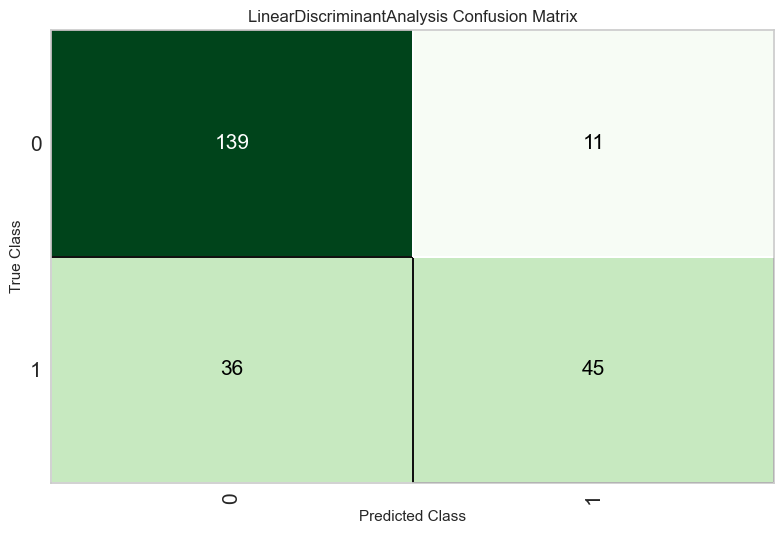

In [23]:
### ANALYZE MODEL
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

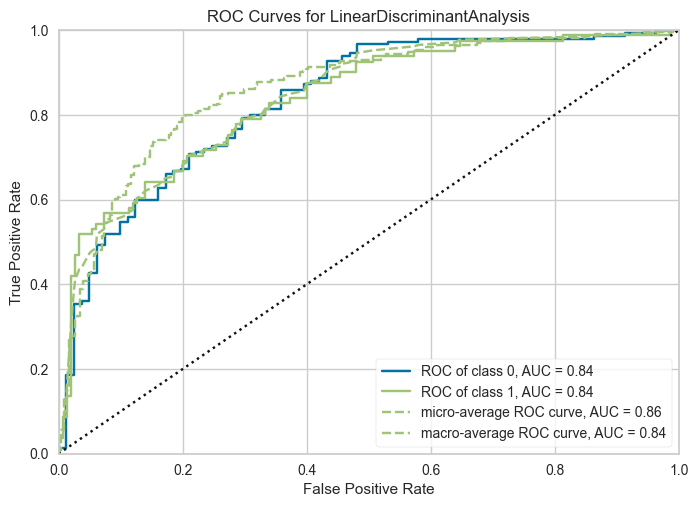

In [24]:
# plot AUC
plot_model(best, plot = 'auc')

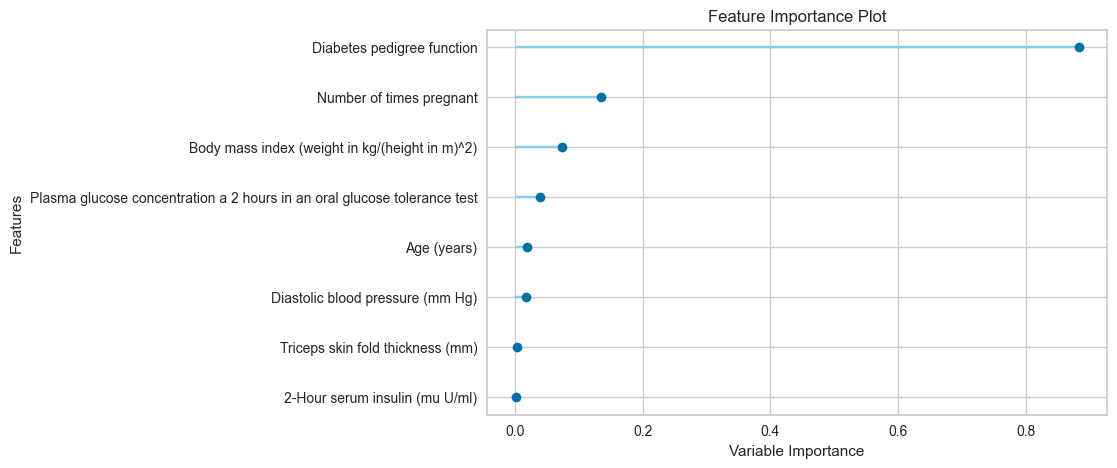

In [25]:
# plot feature importance
plot_model(best, plot = 'feature')

In [26]:
# Hover over plot or check docstring to see available plots
# help(plot_model)

In [27]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [28]:
### PREDICTION
# predict on test set
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.7965,0.8360,0.5556,0.8036,0.6569,0.5191,0.5369


In [29]:
# show predictions df
holdout_pred.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable,prediction_label,prediction_score
182,1,0,74,20,23,27.700001,0.299,21,0,0,0.9988
338,9,152,78,34,171,34.200001,0.893,33,1,1,0.7779
322,0,124,70,20,0,27.400000,0.254,36,1,0,0.8426
219,5,112,66,0,0,37.799999,0.261,41,1,0,0.6449
564,0,91,80,0,0,32.400002,0.601,27,0,0,0.9366


The same function works for predicting the labels on unseen dataset. Let's create a copy of original data and drop the `Class variable`. We can then use the new data frame without labels for scoring.

In [30]:
# copy data and drop Class variable

new_data = data.copy()
new_data.drop('Class variable', axis=1, inplace=True)
new_data.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years)
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [31]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),prediction_label,prediction_score
0,6,148,72,35,0,33.599998,0.627,50,1,0.7543
1,1,85,66,29,0,26.600000,0.351,31,0,0.9552
2,8,183,64,0,0,23.299999,0.672,32,1,0.8563
3,1,89,66,23,94,28.100000,0.167,21,0,0.9649
4,0,137,40,35,168,43.099998,2.288,33,1,0.8794


In [32]:
# save pipeline
save_model(best, 'my_classification_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Number of times pregnant',
                                              'Plasma glucose concentration a 2 '
                                              'hours in an oral glucose '
                                              'tolerance test',
                                              'Diastolic blood pressure (mm Hg)',
                                              'Triceps skin fold thickness (mm)',
                                              '2-Hour serum insulin (mu U/ml)',
                                              'Body mass index (weight in '
                                              'kg/(height in m)^2)',
                                              'Diabetes pedigre...
                                                               missing_values=nan,
                                     

In [33]:
# load pipeline
loaded_best_pipeline = load_model('my_classification_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/var/folders/j4/0lv7gs9s385byhj07wh6tch40000gp/T/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Number of times pregnant',
                                             'Plasma glucose concentration a 2 '
                                             'hours in an oral glucose '
                                             'tolerance test',
                                             'Diastolic blood pressure (mm Hg)',
                                             'Triceps skin fold thickness (mm)',
                                             '2-Hour serum insulin (mu U/ml)',
                                             'Body...
                                                              missing_values=nan,
                                                              strategy='most_frequent'))),
                ('clean_column_names',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                ('trained_model',
                 LinearDiscriminantAnalysis(covariance_estimator=None,
                                            n_components=None, priors=None,
                                            shrinkage=None, solver='svd',
                                            store_covariance=False,
                                            tol=0.0001))],
         verbose=False)

### 4.3.1 Rethinking Assignment 2.2: Logistic Regression

In the original assignment, you used pumpkin data, cleaned and standardized, to build a Logistic Regression model in a Jupyter notebook. You have evaluated your model manually by a confusion matrix and the ROC curve. The results were as follows.


#### 2.2 Logistic Regression results (16)
<table id="org22c40f0" border="2" cellspacing="0" cellpadding="6" rules="groups" frame="hsides">
<caption class="t-above"><span class="table-number">Table 1:</span> where EDA:= Exploratory Data Analysis, CFM: Confusion Matric</caption>

<colgroup>
<col  class="org-left" />

<col  class="org-left" />

<col  class="org-left" />

<col  class="org-left" />

<col  class="org-left" />
</colgroup>
<thead>
<tr>
<th scope="col" class="org-left">Name</th>
<th scope="col" class="org-left">Description</th>
<th scope="col" class="org-left">EDA</th>
<th scope="col" class="org-left">CFM</th>
<th scope="col" class="org-left">ROC</th>
</tr>
</thead>

<tbody>
<tr>
<td class="org-left">ERZS</td>
<td class="org-left">.</td>
<td class="org-left">&#xa0;</td>
<td class="org-left">&#xa0;</td>
<td class="org-left">&#xa0;</td>
</tr>


<tr>
<td class="org-left">JACQ</td>
<td class="org-left">Great data exploration (VAR,DAT,PRI:CLR)</td>
<td class="org-left">A+</td>
<td class="org-left">A+</td>
<td class="org-left">A+</td>
</tr>


<tr>
<td class="org-left">JORG</td>
<td class="org-left">Interesting: West/East USA, data <a href="https://paperswithcode.com/task/imputation">imputation</a>, balance check, F1 score 0.6946, its meaning %70 accuracy</td>
<td class="org-left"><del><del>+</del></del></td>
<td class="org-left">?</td>
<td class="org-left">?</td>
</tr>


<tr>
<td class="org-left">JULW</td>
<td class="org-left">Color only? Test score: 0.9736. Data Imbalance in the CFM? ROC shape - region?</td>
<td class="org-left">C</td>
<td class="org-left">B</td>
<td class="org-left">B</td>
</tr>


<tr>
<td class="org-left">KREB</td>
<td class="org-left">Similar to JULW.</td>
<td class="org-left">C</td>
<td class="org-left">B</td>
<td class="org-left">B</td>
</tr>


<tr>
<td class="org-left">LEOR</td>
<td class="org-left">Variety(Color): ordinal encoding. F1-score:  0.676. Data Imbalance CFM. ROC always goes from 0 to 1</td>
<td class="org-left">B</td>
<td class="org-left">A</td>
<td class="org-left">B</td>
</tr>


<tr>
<td class="org-left">LUGR</td>
<td class="org-left">Better explanation metrics, Acc: 0.857, Data imbalance CFM (only 3 TN, but viz). ROC shape, value?</td>
<td class="org-left">B+</td>
<td class="org-left">A</td>
<td class="org-left">B</td>
</tr>


<tr>
<td class="org-left">LuLN</td>
<td class="org-left">Same (could have at least change seed )</td>
<td class="org-left">B+</td>
<td class="org-left">A</td>
<td class="org-left">B</td>
</tr>


<tr>
<td class="org-left">MaAN</td>
<td class="org-left">Can't read data</td>
<td class="org-left">-</td>
<td class="org-left">-</td>
<td class="org-left">-</td>
</tr>


<tr>
<td class="org-left">MaJM</td>
<td class="org-left">OK Experimentation, CF very skewed, ROC seems wrong (<b>intersect</b>), %90 split may be too much</td>
<td class="org-left">B</td>
<td class="org-left">B</td>
<td class="org-left">B</td>
</tr>


<tr>
<td class="org-left">MikL</td>
<td class="org-left">Excellent! lambda, Size-Price Correlation: 0.394, MultiD Correlation tensor, only ROC with Size-Price</td>
<td class="org-left">A</td>
<td class="org-left">A</td>
<td class="org-left">-</td>
</tr>


<tr>
<td class="org-left">MorJ</td>
<td class="org-left">Good. Color estimation with <i>all</i> features is a bit boring, CFM still skweded, ROC strange.</td>
<td class="org-left">A-</td>
<td class="org-left">A-</td>
<td class="org-left">A-</td>
</tr>


<tr>
<td class="org-left">NicL</td>
<td class="org-left">Same</td>
<td class="org-left">B+</td>
<td class="org-left">A</td>
<td class="org-left">B</td>
</tr>


<tr>
<td class="org-left">PabA</td>
<td class="org-left">Great data exploration (Cheap, Expensive): Potential data leakage. Perfect F1: 100 %</td>
<td class="org-left">A+</td>
<td class="org-left">A+</td>
<td class="org-left">A+</td>
</tr>


<tr>
<td class="org-left">RoxP</td>
<td class="org-left">Item Size / Color good. CFM has 0 TN. Plots interrupted. ROC curve did not work. Would TA work improve?</td>
<td class="org-left">-</td>
<td class="org-left">-</td>
<td class="org-left">-</td>
</tr>


<tr>
<td class="org-left">&#xa0;</td>
<td class="org-left">Interesting Regression experiments with pumpkin data: Nice.</td>
<td class="org-left">&#xa0;</td>
<td class="org-left">&#xa0;</td>
<td class="org-left">&#xa0;</td>
</tr>


<tr>
<td class="org-left">TobL</td>
<td class="org-left">VAR(['Color', 'High Price', 'Item Size']) is challenging, good. Great multi-ROC. Professional work!</td>
<td class="org-left">A+</td>
<td class="org-left">A+</td>
<td class="org-left">A+</td>
</tr>


<tr>
<td class="org-left">TonD</td>
<td class="org-left">VAR(Interpolated Package &amp; Prices). Too bad with the ValueError 5 log_reg.fit(X_train, y_train) error.</td>
<td class="org-left">A</td>
<td class="org-left">-</td>
<td class="org-left">-</td>
</tr>


<tr>
<td class="org-left">&#xa0;</td>
<td class="org-left">You could probably subtract the min (negative) value, and ceil to have discrete VAR target.</td>
<td class="org-left">&#xa0;</td>
<td class="org-left">&#xa0;</td>
<td class="org-left">&#xa0;</td>
</tr>


<tr>
<td class="org-left">ZuzT</td>
<td class="org-left">Nice start and good idea to experiment with <code>ColumnTransformer</code>, did you fix the error with TA?</td>
<td class="org-left">&#xa0;</td>
<td class="org-left">&#xa0;</td>
<td class="org-left">&#xa0;</td>
</tr>
</tbody>
</table>



#### Assignment 2.2 In PyCaret

Can you use PyCaret for re-solving the Assignment 2.2? Fill out the starter cell below, after Tobias Larsen's assignment 2.2

In [34]:
import pandas as pd
pumpkins = pd.read_csv("https://raw.githubusercontent.com/SMC-AAU-CPH/ML-For-Beginners/main/2-Regression/data/US-pumpkins.csv")
pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [35]:
columns_with_nan = pumpkins.columns[pumpkins.isna().any()].tolist()
columns_to_keep = ['Item Size', 'Color', 'Variety']

pumpkins_cleaned = pumpkins.drop(columns=set(columns_with_nan) - set(columns_to_keep))
pumpkins_cleaned = pumpkins_cleaned.drop('City Name', axis=1)
pumpkins_cleaned = pumpkins_cleaned.drop('Package', axis=1)
pumpkins_cleaned = pumpkins_cleaned.drop('Repack', axis=1)
pumpkins_cleaned = pumpkins_cleaned.drop('Low Price', axis=1)
pumpkins_cleaned = pumpkins_cleaned.drop('Date', axis=1)
pumpkins_cleaned.head()


,Variety,High Price,Item Size,Color
0,NaN,280.0,lge,NaN
1,NaN,280.0,lge,NaN
2,HOWDEN TYPE,160.0,med,ORANGE
3,HOWDEN TYPE,160.0,med,ORANGE
4,HOWDEN TYPE,100.0,lge,ORANGE


In [36]:
#Determine missing 'colors' based on similar 'varieties'
def impute_color(row):
    if pd.isna(row['Color']):
        similar_rows = pumpkins_cleaned[(pumpkins_cleaned['Variety'] == row['Variety']) & (~pumpkins_cleaned['Color'].isna())]
        if not similar_rows.empty:
            most_common_color = similar_rows['Color'].mode().iloc[0]
            return most_common_color
        else:
            return 'MIXED COLORS'
    return row['Color']



In [37]:
pumpkins_cleaned['Color'] = pumpkins_cleaned.apply(impute_color, axis=1)
pumpkins_cleaned.head()

,Variety,High Price,Item Size,Color
0,NaN,280.0,lge,MIXED COLORS
1,NaN,280.0,lge,MIXED COLORS
2,HOWDEN TYPE,160.0,med,ORANGE
3,HOWDEN TYPE,160.0,med,ORANGE
4,HOWDEN TYPE,100.0,lge,ORANGE


In [38]:
from pycaret.classification import *
sCP = setup(pumpkins_cleaned, target = 'Color', session_id = 202)

,Description,Value
0,Session id,202
1,Target,Color
2,Target type,Multiclass
3,Target mapping,"MIXED COLORS: 0, ORANGE: 1, STRIPED: 2, WHITE: 3"
4,Original data shape,"(1757, 4)"
5,Transformed data shape,"(1757, 19)"
6,Transformed train set shape,"(1229, 19)"
7,Transformed test set shape,"(528, 19)"
8,Numeric features,1
9,Categorical features,2


In [39]:
# Start from here, and compare_models(). How does the best model perform compared to your results? Can you improve automatize imputation?
### YOUR CODE HERE.

### 4.3.2 Rethinking Assignment 3.1: Cuisines with various classifiers

Automatize the data processing and parameter experimentation with pycaret

In [40]:
import pandas as pd
cuisines_df = pd.read_csv("https://raw.githubusercontent.com/SMC-AAU-CPH/ML-For-Beginners/main/3-Classification/data/cleaned_cuisines.csv")
cuisines_df.head()

,Unnamed: 0,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,0,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,indian,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [41]:
s42 = setup(cuisines_df, target = 'cuisine', session_id = 789)

,Description,Value
0,Session id,789
1,Target,cuisine
2,Target type,Multiclass
3,Target mapping,"chinese: 0, indian: 1, japanese: 2, korean: 3, thai: 4"
4,Original data shape,"(3995, 382)"
5,Transformed data shape,"(3995, 382)"
6,Transformed train set shape,"(2796, 382)"
7,Transformed test set shape,"(1199, 382)"
8,Numeric features,381
9,Preprocess,True


In [42]:
### Insert futher code here


# 4 Workshop (Part 2): 🚀Deployment

In our curriculum, we saw several ways of deploying our ML models for inference.

For instance
1. [3-CLASSIFICATION](../../3-Classification/README.md) / [4-Applied](../../3-Classification/4-Applied/README.md) converts a trained model to onnx, then uses tensorflow.js to serve it.
2. [This session's project](../1-Web-App/README.md) is a [Flask](https://flask.palletsprojects.com)-based approach that refactors your notebook code and serves it locally. It is also posible to deploy the app to a Platform as a Service (PaaS), such as Heroku.
3. [Microsoft Learning has a module]([https://learn.microsoft.com/en-us/training/modules/python-flask-build-ai-web-app/) that uses a deep learning translator inference at Azure: you can check the demo at the workshop.

✅ Please complete one the above steps to deploy your first web application in this .venv.


## 4.4 Introducing Gradio and Hugging Face Spaces

Welcome to my space: https://huggingface.co/spaces/cerkut/ I'll give you a guided tour.

✅ As you would suspect, there are simpler ways of creating a hosted web app. Please check PyCaret's `create_app` function.

In [43]:

help(create_app)


Help on function create_app in module pycaret.classification.functional:

create_app(estimator, app_kwargs: Optional[dict] = None) -> None
    This function creates a basic gradio app for inference.
    It will later be expanded for other app types such as
    Streamlit.
    
    
    Example
    -------
    >>> from pycaret.datasets import get_data
    >>> juice = get_data('juice')
    >>> from pycaret.classification import *
    >>> exp_name = setup(data = juice,  target = 'Purchase')
    >>> lr = create_model('lr')
    >>> create_app(lr)
    
    
    estimator: scikit-learn compatible object
        Trained model object
    
    
    app_kwargs: dict, default = {} (empty dict)
        arguments to be passed to app class.
    
    
    Returns:
        None



In [44]:
# Now try to create a web app with Gradio using your last best model.
# You may need to edit the name, or directly give one of the performant models as an argument.
# EXAMPLE: create_app('lr') for Logistic Regression
# load pipeline
loaded_best_pipeline = load_model('my_classification_pipeline')
loaded_best_pipeline
create_app(best)

Transformation Pipeline and Model Successfully Loaded
* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


In [46]:
# this is only necessary in a notebook
iface.close()

NameError: name 'iface' is not defined

👆 Student: Interesting. Now I would love to deploy my best model to a Hugging Face Space. How do I do that?
👨‍🏫 Teacher: PyCaret documentation and tutorial show a way to do it (see below), but I could not get it to work.

In [47]:
# create api, comment out to get an app, and it would run, but we'd get "Not Found" error!
# create_api(best, api_name = 'my_first_api')
# Deploy model to a Hugging Face Space


In [48]:
# !python my_first_api.py

👨‍🏫 Teacher: Instead let me show next you how to convert **any** jupyter notebook to a Hugging Face space using `nbdev`, and possibly embed it to **any** webpage, like I do on my [github portfolio](https://cerkut.github.io/posts/2022/11/HuggingFace-Spaces-Embed).

## 4.5 From jupyter notebooks to Hugging Face Spaces

[Hugging Face Spaces](https://huggingface.co/spaces/launch) provides an easy ways to deploy a web app with python.  [Gradio](https://gradio.app/) is one of my favorite tools for building these web apps.  Gradio allows you to prototype your web apps in notebooks which allow you to iterate fast.  However, Hugging Face Spaces requires you to package your web application code as a python script named `app.py`.  

However, **thanks to [nbdev](https://nbdev.fast.ai) you can deploy a Gradio app to Spaces from a notebook without having to refactor your code into a script!**,   When you finish this tutorial, you will have an app that looks like this:

➡️ A Gradio app that shows the size of a HF Dataset: https://huggingface.co/spaces/cerkut/hfds-size


### 4.5.1. Create a Gradio-enabled Space on Hugging Face

The first step is to create a space and select the appropriate sdk (which is Gradio in this example), according to [these instructions](https://huggingface.co/docs/hub/spaces-overview#creating-a-new-space) (⚠️ Requires Sign-up) :

![image.png](https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/hub/spaces-blank-space.png)

We ignore the git-related instructions for the moment.

### 4.5.2. Decorete the notebook
Next, write the functions your gradio app will use.  Because of [nbdev](https://nbdev.fast.ai/blog/posts/2022-07-28-nbdev2/), you can prototype and package your code all in one place.  **The special comment `#|export` marks which cells will be sent to a python script** (more on this later). Note that there are only three cells in this notebook with the `#|export` directive.


In [ ]:
#|export
import gradio as gr
from fastcore.net import urljson, HTTPError

In [ ]:
#|export
def size(repo:str):
    "Returns the size in GB of a HuggingFace Dataset."
    url = f'https://huggingface.co/api/datasets/{repo}'
    try: resp = urljson(f'{url}/treesize/main')
    except HTTPError: return f'Did not find repo: {url}'
    gb = resp['size'] / 1e9
    return f'{gb:.2f} GB'

`size` takes as an input a [Hugging Face Dataset](https://huggingface.co/docs/datasets/index) repo and returns the total size in GB of the data.

For example, I can check the size of [tglcourse/CelebA-faces-cropped-128](https://huggingface.co/datasets/tglcourse/CelebA-faces-cropped-128) like so:

In [ ]:
size("tglcourse/CelebA-faces-cropped-128")

'5.49 GB'

### 4.5.3 Make an interface and test the app

You can construct a simple UI with the `gradio.interface` and then call the `launch` method of that interface to display a preview in a notebook.  This is a great way to test your app to see if it works

In [ ]:
#|export
iface = gr.Interface(fn=size, inputs=gr.Text(value="tglcourse/CelebA-faces-cropped-128"), outputs="text")
iface.launch(height=450, width=500)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

Note how running the `launch()` method in a notebook runs a webserver in the background.  Below, we call the `close()` method to close the webserver.

In [ ]:
# this is only necessary in a notebook
iface.close()

Closing server running on port: 7861


### 4.5.4 Convert notebook into a gradio app
In order to host this code on Hugging Face Spaces, you will export parts of this notebook to a script named `app.py`.  As a reminder, this is what the special `#|export` comment that you have seen in cells above do!  You can export code from this notebook like so:

In [ ]:
!pip install --upgrade nbdev
from nbdev import *
print(nbdev.__version__)
# help(nb_export) # For some reason, converting *this* notebook does not work.

2.3.12


In [ ]:
import shutil
# We therefore convert a barebones notebook instead.
# shutil.rmtree('tmp', ignore_errors=True)
# nb_export('4-Workshop-VC.ipynb', 'tmp')

# nb_export('4-Workshop-VC.ipynb', lib_path='.')

Notice how the contents of app.py only contains the exported cells from this notebook:

In [ ]:
%pycat app.py

Error: no such file, variable, URL, history range or macro


### 4.5.6 Fill out requirements.txt and commit the three files
You must supply a requirements.txt file so the Gradio app knows how to build your dependencies. In this example, the only dependency other than Gradio is fastcore. You don't need to specify Gradio itself as a dependency in requirements.txt, so our requirements.txt file has only one dependency:

In [ ]:
%%writefile requirements.txt
fastcore

Writing requirements.txt


Now go to your Hugging Face Space's file section (mine is at https://huggingface.co/spaces/cerkut/hfds-size/tree/main), press the rightmost `+ Add file` tab and "Upload files", and post the tree files 1) app.ipynb 2) app.py and 3) requirements.txt. Commit directly to the main branch, wait about 1-2 minutes after the upload for your space to build, and then enjoy your first deployment.

Expanding the 3-dots ㆔ between ☸ Settings and your logo, you can now clone, embed, or duplicate your space for other projects.

✅ Modify app.ipynb to deploy a Machine Learning model to another Hugging Face Space.